# Import Statements and Loading the Dataset

In [1]:
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display, HTML
import seaborn as sns
import time


# This is to make pandas display all columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("LR Heart Disease.csv")

# Data Exploration and Preparation

## Data Exploration

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


From this quick look at our data we can see there is very little preparation we have to do before feeding this data into our model.

In [4]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


There are  missing values in any of our data columns, this means we will have to do this after some exploration

In [5]:
# Pulling all headers out to Numpy Array for Looping
plots = df.columns.to_numpy()
# List to store file paths of saved figures
figure_paths = []

for cols in plots:
    if (np.where(plots == cols)[0][0]) in [1, 2, 4, 9, 10, 11, 12, 13, 14]:
        # Set the title for the plot
        plt.hist(df[cols])
        plt.title(f"{cols} Distribution")
        
        # Save the plot to an image file (PNG format)
        file_path = f"{cols}_histogram.png"
        plt.savefig(file_path)
        
        # Append the file path to the list
        figure_paths.append(file_path)
        
        # Clear the current plot to start a new one
        plt.clf()
        
    if(np.where(plots == cols)[0][0]) in [0, 3, 5, 6, 7, 8, 15]:
        # Calculate counts of ones and zeros
        counts = df[cols].value_counts()
        plt.pie(counts, labels = counts.index, autopct='%1.1f%%', startangle = 90)
        # Set the title for the plot
        plt.title(f"{cols} Distribution")
        
        # Save the plot to an image file (PNG format)
        file_path = f"{cols}_pie.png"
        plt.savefig(file_path)
        
        # Append the file path to the list
        figure_paths.append(file_path)
        
        # Clear the current plot to start a new one
        plt.clf()
    # if(np.where(plots == cols)[0][0]) == 

<Figure size 640x480 with 0 Axes>

In [6]:
# Function to display images in a bordered box
def display_image_with_border(image_path):
    return f'<div style="border: 2px solid black; padding: 10px; display: inline-block;"><img src="{image_path}" width="400"></div>'

# Display all the saved figures
display(HTML(''.join([display_image_with_border(file_path) for file_path in figure_paths])))

In [7]:
column_of_interest =  "TenYearCHD"
correlation_matrix = df.corr()
correlations = correlation_matrix[column_of_interest]

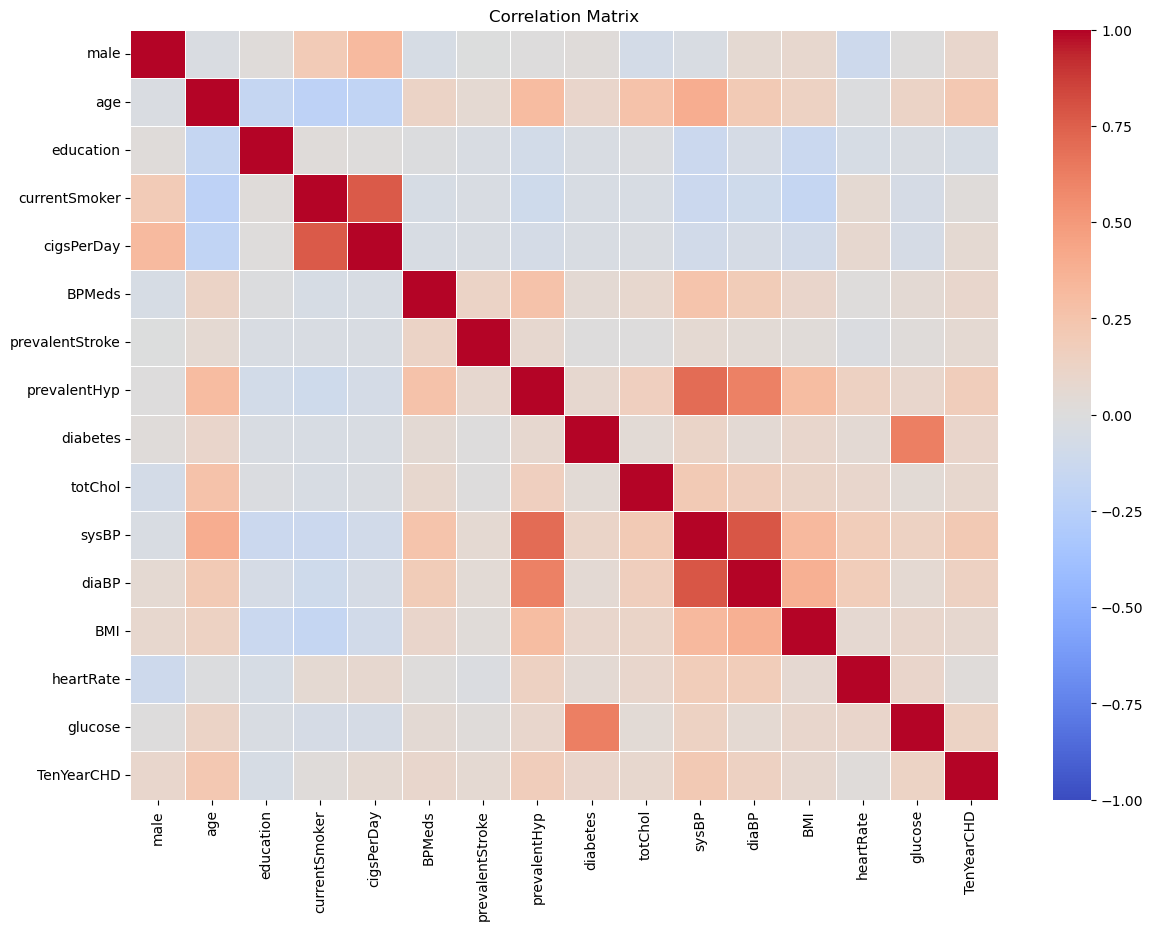

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin = (-1), vmax = 1)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# This code is to have a look at the correlation of the variables to TenYearCHD specifically
specific_column = 'TenYearCHD'  
other_columns = [col for col in df.columns if col != 'TenYearCHD']

# Computing the correlation matrix
correlation_matrix = df[other_columns].corrwith(df[specific_column])

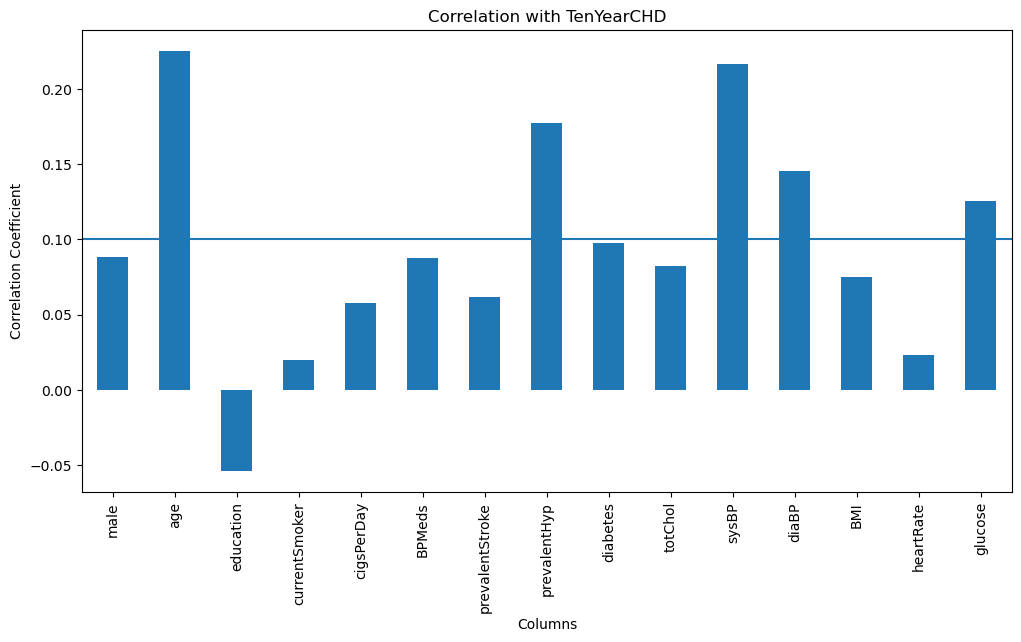

In [10]:
# Plotting the correlation values
correlation_matrix.plot(kind='bar', figsize=(12, 6))
plt.title(f'Correlation with {specific_column}')
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.axhline(y = 0.1)
plt.show()

In [11]:
# df = df.drop(['education', 'heartRate', 'currentSmoker'], axis = 1)
# df = df.loc[:,['age', 'prevalentHyp', 'sysBP', 'diaBP', 'glucose', 'TenYearCHD']]

In [12]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
df['cigsPerDay'].fillna(value = 0, inplace = True)                       # Most common value at around 50%
df['BPMeds'].fillna(value = 0, inplace = True)                           # Most common value at 97%
df['totChol'].fillna(value = df['totChol'].median(), inplace = True)     # Decided based on distribution
df['BMI'].fillna(value = df['BMI'].median(), inplace = True)             # Decided based on Distribution
df['heartRate'].fillna(value = df['heartRate'].median(), inplace = True) # Decided based on Distribution
df['glucose'].fillna(value = df['glucose'].median(), inplace = True)     # Decided based on Distribution
df['education'].fillna(value = 2, inplace = True)        # Decided based on Distribution

In [14]:
# Check for missing values again in the DataFrame
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


## Here we will balance the df to make sure there is an even spread of target category.

In [15]:
df_neg = df[df['TenYearCHD'] == 0]
df_pos = df[df['TenYearCHD'] == 1]
rnd_num = 2345
balanced = df_neg.sample(len(df_pos), random_state = rnd_num)
df = pd.concat([balanced, df_pos])

counts = df['TenYearCHD'].value_counts()
ratio = (counts[0]/len(df))

print(f'The ratio of Ten Year CHD positive to negative is {ratio*100}%')

The ratio of Ten Year CHD positive to negative is 50.0%


## Data Splitting and Scaling

In [16]:
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

In [17]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Compute normalization parameters on the training data
scaler = StandardScaler()
scaler.fit(X_train)  # Computes mean and standard deviation based on X_train

# Step 3: Normalize the training data
X_train_normalized = scaler.transform(X_train)

# Step 4: Normalize the testing data using the training parameters
X_test_normalized = scaler.transform(X_test)

# Making the Model

## Define the Sigmoid Function for clarity

    Sigmoid Function:
    The sigmoid function is used to map any real-valued number to the range [0, 1], which is interpreted as a probability.

\begin{equation}
σ(z)= \dfrac{1}{1+e−z} 
\end{equation}

The rest of these funcitons can be found in the accompanyig journal

## Define the Logistic Regression Model

<font color='lightgreen'>
    
> ### **This is the first attempt at the model using intitial Chat GPT code.**
    
</font>

import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y, theta):
        m = len(y)
        h = self.sigmoid(np.dot(X, theta))
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def fit(self, X, y):
        # Add a column of ones for the bias term
        X = np.c_[np.ones((X.shape[0], 1)), X]
        m, n = X.shape
        self.theta = np.zeros(n)

        for i in range(self.num_iterations):
            h = self.sigmoid(np.dot(X, self.theta))
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient

            if i % 100 == 0:
                cost = self.cost_function(X, y, self.theta)
                print(f"Iteration {i}, Cost: {cost}")

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        probabilities = self.sigmoid(np.dot(X, self.theta))
        predictions = (probabilities >= 0.5).astype(int)
        return predictions

# Example usage
# Assume X_train and y_train are the training data and labels
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

# Assume X_test is the test data
predictions = model.predict(X_test)


class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=1000, bias = 1):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.bias = bias

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y, theta):  #binary cross-entropy loss
        # m = len(y)
        # h = self.sigmoid(np.dot(X, theta))
        # cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        # return cost

    def fit(self, X, y):
        X = np.c_[np.full((X.shape[0], 1), self.bias), X]  # Add a column of ones for the bias term
        m, n = X.shape
        self.theta = np.zeros(n)
        print(X.type)

        for i in range(self.num_iterations):
            h = self.sigmoid(np.dot(X, self.theta))
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient
            X[:,0] = (h - y)/m
            
            if i % 100 == 0:
                cost = self.cost_function(X, y, self.theta)
                print(f"Iteration {i}, Cost: {cost}")

    def predict(self, X):
        X = np.c_[np.full((X.shape[0], 1), self.bias), X]  # Add a column of ones for the bias term
        probabilities = self.sigmoid(np.dot(X, self.theta))
        # predictions = (probabilities >= 0.5).astype(int)
        return probabilities


<font color='lightgreen'>

> ### **This is the Second attempt at creating a LogReg model using my learnings from the first one and using the course resources as reference**
    
</font>

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=1000, bias = 1):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.bias = bias

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def bce_loss(self, pred_y, true_y):  #binary cross-entropy loss
        loss = -np.mean(true_y * np.log(pred_y) + (1 - true_y) * np.log(1 - pred_y))
        return loss

    def predict(self, X, weights, bias):
        z = np.dot(X, weights) + bias
        return (self.sigmoid(z))
        
    def fit(self, X_train, y_train, X_test, y_test):
        y_test = (y_test).values.reshape(-1,1)
        y_train = (y_train).values.reshape(-1,1)
        weights = np.zeros((X_train.shape[1],1))
        m, n = X_train.shape
        # /losses = []
        for i in range(self.num_iterations):
            pred_y = (self.predict(X_train, weights, self.bias)).reshape(-1,1)
            error = (pred_y - y_train)
            weight_gradient = np.dot(X_train.T, error) / m
            bias_gradient = np.sum(error) / m
            weights -= self.learning_rate * weight_gradient
            self.bias -= self.learning_rate * bias_gradient
            
            if i % 100 == 0:
                loss = self.bce_loss(pred_y, y_train)
                test_pred = self.predict(X_test, weights, bias)
                loss_test = self.bce_loss(test_pred, y_test)
                test_acc = accuracy_score(y_test, (test_pred >= 0.5).astype(int))
                print(f"Iteration {i}, Binary cross-entropy loss: {loss}, Test loss: {loss_test}, Accuracy on Test set: {test_acc}")

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=1000, bias = 1):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.bias = bias

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def bce_loss(self, pred_y, true_y):  #binary cross-entropy loss
        loss = -np.mean(true_y * np.log(pred_y) + (1 - true_y) * np.log(1 - pred_y))
        return loss

    def predict(self, X, weights, bias):
        z = np.dot(X, weights) + bias
        return (self.sigmoid(z))
        
    def fit(self, X_train, y_train, X_test, y_test):
        y_test = (y_test).values.reshape(-1,1)
        y_train = (y_train).values.reshape(-1,1)
        weights = np.zeros((X_train.shape[1],1))
        m, n = X_train.shape
        # /losses = []
        
        # testing performance and updating model parameters
        for i in range(self.num_iterations):
            pred_y = (self.predict(X_train, weights, self.bias)).reshape(-1,1)
            error = (pred_y - y_train)
            weight_gradient = np.dot(X_train.T, error) / m
            bias_gradient = np.sum(error) / m
            weights -= self.learning_rate * weight_gradient
            self.bias -= self.learning_rate * bias_gradient
            
            
            # printing results on a periodic basis
            if i % 100 == 0:
                loss = self.bce_loss(pred_y, y_train)
                test_pred = self.predict(X_test, weights, bias)
                loss_test = self.bce_loss(test_pred, y_test)
                test_acc = accuracy_score(y_test, (test_pred >= 0.5).astype(int))
                print(f"Iteration {i}, Binary cross-entropy loss: {loss}, Test loss: {loss_test}, Accuracy on Test set: {test_acc}")


<font color='lightgreen'>
    
> ### **This is the third model that is created using my code, modified by chat GPT to include regularisation, and including bias within the weights**
    
</font>

In [18]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=1000, regularization=None, reg_param=0.1, verbose = False, history = False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization = regularization  # 'l1', 'l2', or None
        self.reg_param = reg_param  # Regularization parameter
        self.history = history
        self.verbose = verbose
        self.weights = None
        if history: self.metrics = [],[],[],[]

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def bce_loss(self, pred_y, true_y):
        epsilon = 1e-15  # Small constant to prevent log(0)
        pred_y = np.clip(pred_y, epsilon, 1 - epsilon)
        loss = -np.mean(true_y * np.log(pred_y) + (1 - true_y) * np.log(1 - pred_y))
        return loss
    
    def history_func(self, X_val, y_val): 
        val_z = np.dot(X_val, self.weights)# + self.bias
        val_prob = self.sigmoid(val_z)
        val_pred = (val_prob >= 0.5).astype(int)
        
        self.metrics[0].append(accuracy_score(y_val, val_pred))
        self.metrics[1].append(precision_score(y_val,val_pred))
        self.metrics[2].append(recall_score(y_val,val_pred))
        self.metrics[3].append(f1_score(y_val, val_pred))
        
        
        
    def fit(self, X_train, y_train, X_val, y_val):
        y_train = y_train.values.reshape(-1, 1)
        y_val = y_val.values.reshape(-1, 1)

        m, n = X_train.shape
        self.weights = np.zeros((n, 1))
        for i in range(self.num_iterations):
            z = np.dot(X_train, self.weights)
            pred_y = self.sigmoid(z)
            error = pred_y - y_train

            weight_gradient = np.dot(X_train.T, error) / m
            # bias_gradient = np.sum(error) / m

            if self.regularization == 'l1':
                weight_gradient += (self.reg_param / m) * np.sign(self.weights)
                # bias_gradient += (self.reg_param / m) * np.sign(self.bias)
            elif self.regularization == 'l2':
                weight_gradient += (self.reg_param / m) * self.weights
                # bias_gradient += (self.reg_param / m) * self.bias
            
            self.weights -= self.learning_rate * weight_gradient
            self.weights -= self.learning_rate * self.reg_param * self.weights
            # self.bias -= self.learning_rate * bias_gradient
            # self.bias -= self.learning_rate * self.reg_param * self.bias

            if self.history: 
                self.history_func(X_val, y_val)

            if i % 100 == 0 and self.verbose:
                train_loss = self.bce_loss(pred_y, y_train)
                val_z = np.dot(X_val, self.weights)
                val_prob = self.sigmoid(val_z)
                val_pred = (val_prob >= 0.5).astype(int)
                val_loss = self.bce_loss(val_pred, y_val)

                val_acc = accuracy_score(y_val,val_pred)# (val_pred >= 0.5).astype(int))
                print(f"Iteration {i}, Train Loss: {train_loss}, Val Loss: {val_loss}, Val Accuracy: {val_acc}")
        
        if self.history:
            return self.metrics
    
    def predict_prob(self, X):
        z = np.dot(X, self.weights)# + self.bias
        return self.sigmoid(z)
    
    def predict(self, X):
        return self.predict_prob(X).round()


## Train the Logistic Regression Model

In [19]:
start_time = time.time()
model = LogisticRegression(num_iterations= 20000, history = True)
history = model.fit(X_train_normalized, y_train, X_test_normalized, y_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 82.78751921653748 seconds ---


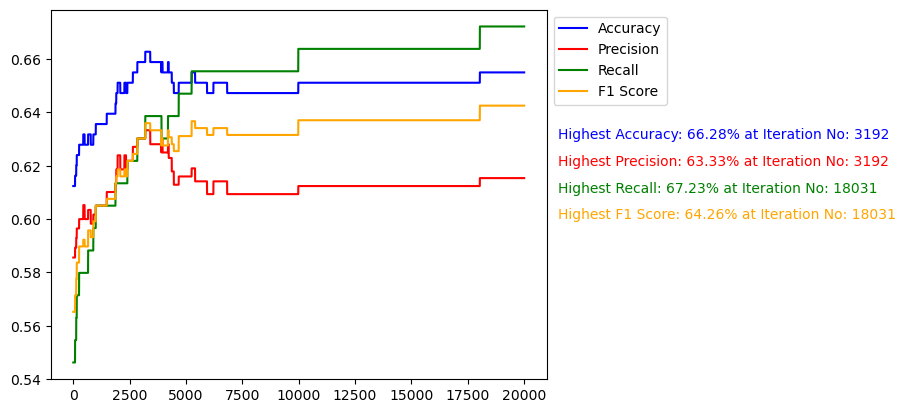

In [20]:
ind = []
for i in range(len(history)):
    ind.append(i)

plt.clf
plt.plot(history[0][1:], color = 'blue', label = 'Accuracy')
plt.plot(history[1][1:], color = 'red',  label = 'Precision')
plt.plot(history[2][1:], color = 'green', label = 'Recall')
plt.plot(history[3][1:], color = 'orange', label = 'F1 Score')

plt.text(len(history[0]) + 1500, 0.63,
         f'Highest Accuracy: {round(np.max(history[0][1:])*100, 2)}% at Iteration No: {history[0].index([np.max(history[0][1:])])}',
         fontsize = 10, color = 'blue')
plt.text(len(history[0]) + 1500, 0.62,
         f'Highest Precision: {round(np.max(history[1][1:])*100, 2)}% at Iteration No: {history[1].index([np.max(history[1][1:])])}',
         fontsize = 10, color = 'red')
plt.text(len(history[0]) + 1500, 0.61,
         f'Highest Recall: {round(np.max(history[2][1:])*100, 2)}% at Iteration No: {history[2].index([np.max(history[2][1:])])}',
         fontsize = 10, color = 'green')
plt.text(len(history[0]) + 1500, 0.6,
         f'Highest F1 Score: {round(np.max(history[3][1:])*100, 2)}% at Iteration No: {history[3].index([np.max(history[3][1:])])}',
         fontsize = 10, color = 'orange')

# plt.ylim(0.4,0.7)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [21]:
opt_iter = (history[2].index([np.max(history[2][1:])]))
default_model = LogisticRegression(num_iterations= opt_iter)
history = default_model.fit(X_train_normalized, y_train, X_test_normalized, y_test)
print(opt_iter)

18031


In [22]:
probabilities = default_model.predict_prob(X_test_normalized)
predictions = default_model.predict(X_test_normalized)

<function matplotlib.pyplot.show(close=None, block=None)>

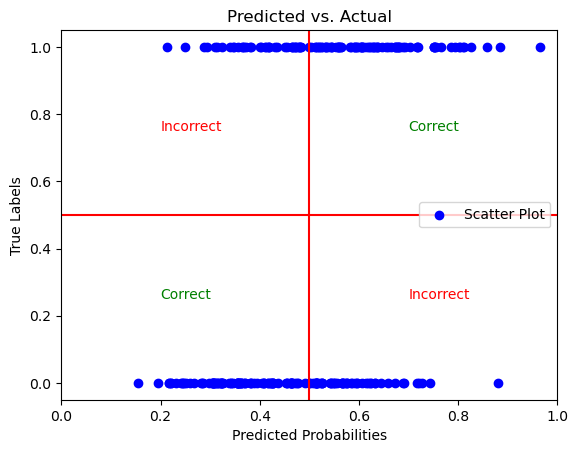

In [23]:
plt.scatter(probabilities, y_test, color='blue', label='Scatter Plot')
plt.xlabel('Predicted Probabilities')
plt.ylabel('True Labels')
plt.title('Predicted vs. Actual')
plt.axvline(x=0.5, color='r')
plt.axhline(y=0.5, color='r')
plt.text(0.2, 0.75, "Incorrect", fontsize = 10, color = 'red')
plt.text(0.2, 0.25, "Correct", fontsize = 10, color = 'green')
plt.text(0.7, 0.75, "Correct", fontsize = 10, color = 'green')
plt.text(0.7, 0.25, "Incorrect", fontsize = 10, color = 'red')
plt.xlim(0,1)
plt.legend()
plt.show

In [24]:
accuracy = accuracy_score(y_test, predictions)
print(f' The models accuracy is {round(accuracy*100, 2)}%')

 The models accuracy is 65.12%


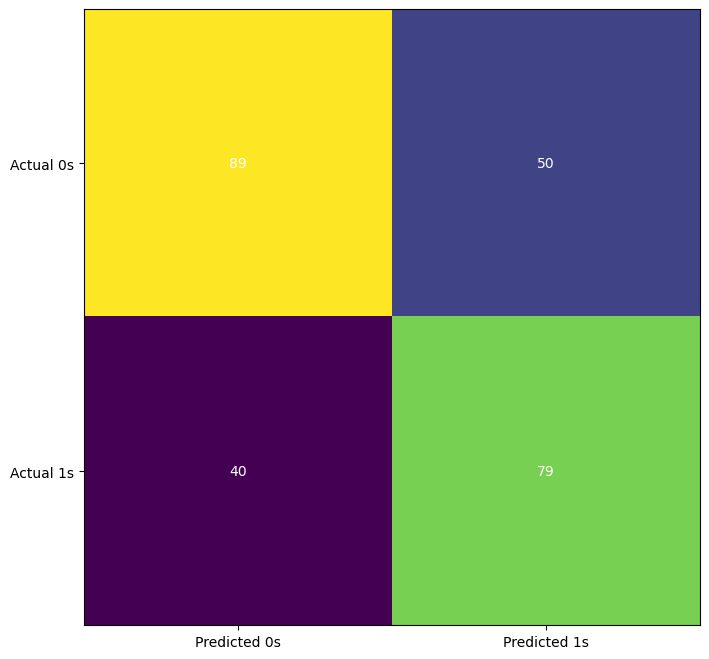

In [25]:
cm = confusion_matrix(y_test, default_model.predict(X_test_normalized))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [26]:
print(classification_report(y_test, default_model.predict(X_test_normalized)))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       139
           1       0.61      0.66      0.64       119

    accuracy                           0.65       258
   macro avg       0.65      0.65      0.65       258
weighted avg       0.65      0.65      0.65       258



# Parameter Optimisation

### Learning rate Checks

In [27]:
rates = [0.0001,0.0005, 0.001, 0.01, 0.1, 0.5, 1, 1.5, 2, 2.5, 3]
accuracies = []
precisions = []
recalls = []
f1Scores = []

for rate in rates:
    model = LogisticRegression(learning_rate=rate, num_iterations=opt_iter)
    model.fit(X_train_normalized, y_train, X_test_normalized, y_test)
    probabilities = model.predict_prob(X_test_normalized)
    predictions = model.predict(X_test_normalized)

    accuracies.append(accuracy_score(y_test, predictions))
    precisions.append(precision_score(y_test, predictions))
    recalls.append(recall_score(y_test, predictions))
    f1Scores.append(f1_score(y_test, predictions))

In [28]:
rates_str = list(map(str, rates))

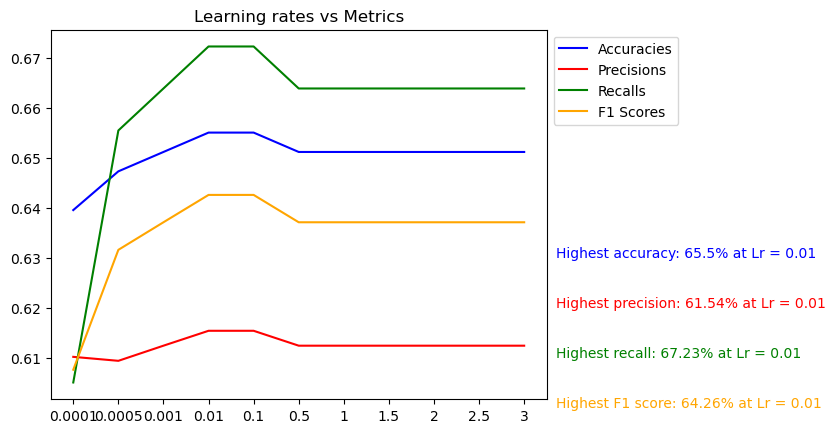

In [29]:
plt.clf
plt.plot(rates_str, accuracies, color='blue', label='Accuracies')
plt.plot(rates_str, precisions, color='red', label='Precisions')
plt.plot(rates_str, recalls, color='green', label='Recalls')
plt.plot(rates_str, f1Scores, color='orange', label='F1 Scores')
plt.title('Learning rates vs Metrics')

plt.text(len(rates_str)-0.3, 0.63,
         f'Highest accuracy: {round(np.max(accuracies)*100, 2)}% at Lr = {rates_str[accuracies.index(np.max(accuracies))]}',
         fontsize = 10, color = 'blue')
plt.text(len(rates_str)-0.3, 0.62,
         f'Highest precision: {round(np.max(precisions)*100, 2)}% at Lr = {rates_str[precisions.index(np.max(precisions))]}',
         fontsize = 10, color = 'red')
plt.text(len(rates_str)-0.3, 0.61,
         f'Highest recall: {round(np.max(recalls)*100, 2)}% at Lr = {rates_str[recalls.index(np.max(recalls))]}',
         fontsize = 10, color = 'green')
plt.text(len(rates_str)-0.3, 0.60,
         f'Highest F1 score: {round(np.max(f1Scores)*100, 2)}% at Lr = {rates_str[f1Scores.index(np.max(f1Scores))]}',
         fontsize = 10, color = 'orange')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Regularisation testing and experimentation 

In [30]:
levels = [None, 'l1', 'l2']
regs = []
accuracies = []
precisions = []
recalls = []
f1Scores = []
lvl_probabilities = []


for i in range(0, 20, 1):
    regs.append(i/10)

for level in levels:
    # print(level)
    # print(regs)
    for reg in regs:
        # print(f'######################################################### Beginning fitting for {level},{reg} #########################################################')
        model = LogisticRegression(learning_rate=0.01, num_iterations=opt_iter, regularization = level, reg_param = reg)
        model.fit(X_train_normalized, y_train, X_test_normalized, y_test)
        probabilities = model.predict_prob(X_test_normalized)
        predictions = model.predict(X_test_normalized)
        
        accuracies.append(accuracy_score(y_test, predictions))
        precisions.append(precision_score(y_test, predictions))
        recalls.append(recall_score(y_test, predictions))
        f1Scores.append(f1_score(y_test, predictions))
        
        if reg == 0.3:
            lvl_probabilities.append(probabilities)

In [31]:
none_accuracies = accuracies[0:len(regs)]
none_precisions = precisions[0:len(regs)]
none_recalls    = recalls[0:len(regs)]
none_f1Scores   = f1Scores[0:len(regs)]

l1_accuracies = accuracies[len(regs):2*len(regs)]
l1_precisions = precisions[len(regs):2*len(regs)]
l1_recalls    = recalls[len(regs):2*len(regs)]
l1_f1Scores   = f1Scores[len(regs):2*len(regs)]

l2_accuracies = accuracies[2*len(regs):]
l2_precisions = precisions[2*len(regs):]
l2_recalls    = recalls[2*len(regs):]
l2_f1Scores   = f1Scores[2*len(regs):]

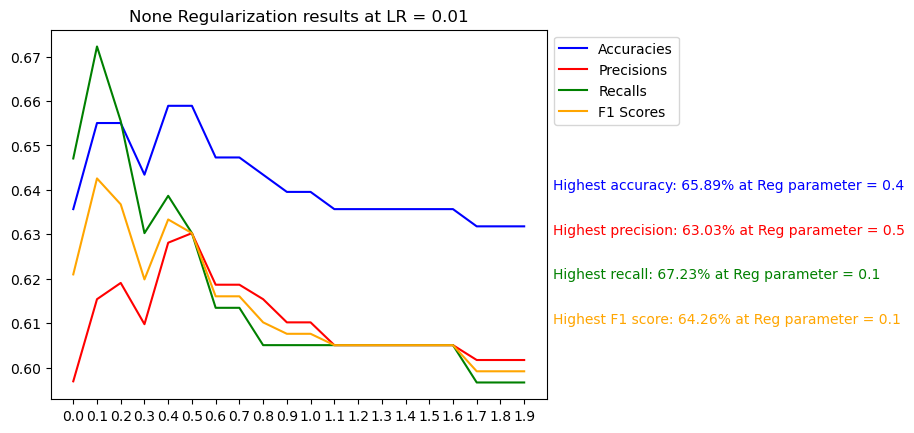

In [32]:
plt.clf
plt.plot(regs, none_accuracies, color='blue', label='Accuracies')
plt.plot(regs, none_precisions, color='red', label='Precisions')
plt.plot(regs, none_recalls, color='green', label='Recalls')
plt.plot(regs, none_f1Scores, color='orange', label='F1 Scores')
plt.title('None Regularization results at LR = 0.01')

plt.text(np.max(regs) + 0.12, 0.64,
         f'Highest accuracy: {round(np.max(none_accuracies)*100, 2)}% at Reg parameter = {regs[none_accuracies.index(np.max(none_accuracies))]}',
         fontsize = 10, color = 'blue')
plt.text(np.max(regs) + 0.12, 0.63,
         f'Highest precision: {round(np.max(none_precisions)*100, 2)}% at Reg parameter = {regs[none_precisions.index(np.max(none_precisions))]}',
         fontsize = 10, color = 'red')
plt.text(np.max(regs) + 0.12, 0.62,
         f'Highest recall: {round(np.max(none_recalls)*100, 2)}% at Reg parameter = {regs[none_recalls.index(np.max(none_recalls))]}',
         fontsize = 10, color = 'green')
plt.text(np.max(regs) + 0.12, 0.61,
         f'Highest F1 score: {round(np.max(none_f1Scores)*100, 2)}% at Reg parameter = {regs[none_f1Scores.index(np.max(none_f1Scores))]}',
         fontsize = 10, color = 'orange')


plt.xticks(np.arange(0, 2, 0.1))
plt.legend(bbox_to_anchor=(1.28, 1))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

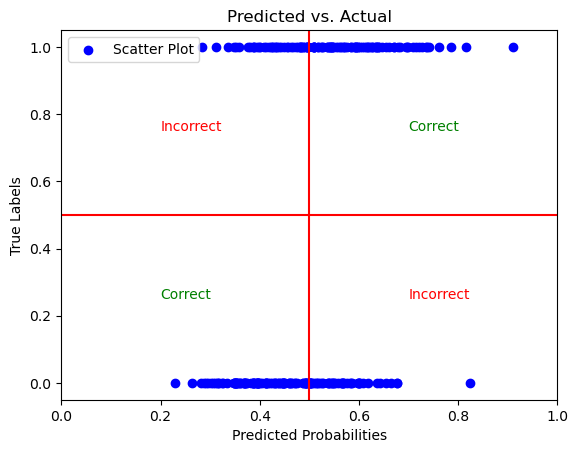

In [33]:
plt.scatter(lvl_probabilities[0], y_test, color='blue', label='Scatter Plot')
plt.xlabel('Predicted Probabilities')
plt.ylabel('True Labels')
plt.title('Predicted vs. Actual')
plt.axvline(x=0.5, color='r')
plt.axhline(y=0.5, color='r')
plt.text(0.2, 0.75, "Incorrect", fontsize = 10, color = 'red')
plt.text(0.2, 0.25, "Correct", fontsize = 10, color = 'green')
plt.text(0.7, 0.75, "Correct", fontsize = 10, color = 'green')
plt.text(0.7, 0.25, "Incorrect", fontsize = 10, color = 'red')
plt.xlim(0,1)
plt.legend()
plt.show

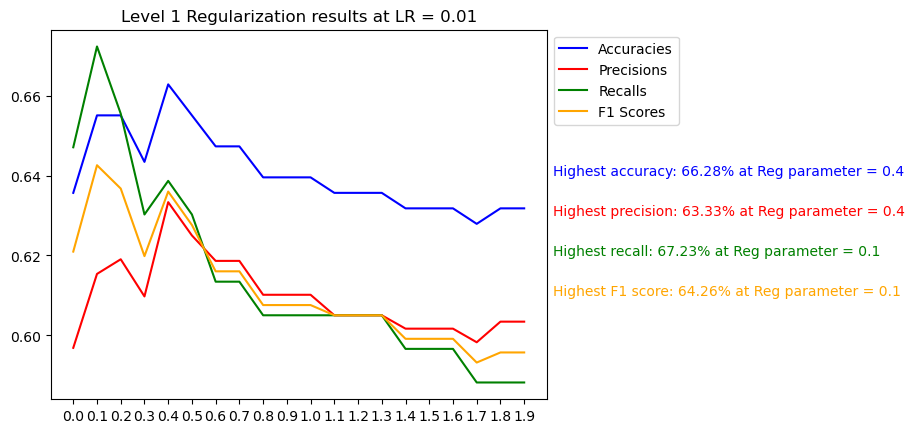

In [34]:
plt.clf
plt.plot(regs, l1_accuracies, color='blue', label='Accuracies')
plt.plot(regs, l1_precisions, color='red', label='Precisions')
plt.plot(regs, l1_recalls, color='green', label='Recalls')
plt.plot(regs, l1_f1Scores, color='orange', label='F1 Scores')
plt.title('Level 1 Regularization results at LR = 0.01')

plt.text(np.max(regs) + 0.12, 0.64,
         f'Highest accuracy: {round(np.max(l1_accuracies)*100, 2)}% at Reg parameter = {regs[l1_accuracies.index(np.max(l1_accuracies))]}',
         fontsize = 10, color = 'blue')
plt.text(np.max(regs) + 0.12, 0.63,
         f'Highest precision: {round(np.max(l1_precisions)*100, 2)}% at Reg parameter = {regs[l1_precisions.index(np.max(l1_precisions))]}',
         fontsize = 10, color = 'red')
plt.text(np.max(regs) + 0.12, 0.62,
         f'Highest recall: {round(np.max(l1_recalls)*100, 2)}% at Reg parameter = {regs[l1_recalls.index(np.max(l1_recalls))]}',
         fontsize = 10, color = 'green')
plt.text(np.max(regs) + 0.12, 0.61,
         f'Highest F1 score: {round(np.max(l1_f1Scores)*100, 2)}% at Reg parameter = {regs[l1_f1Scores.index(np.max(l1_f1Scores))]}',
         fontsize = 10, color = 'orange')


plt.xticks(np.arange(0, 2, 0.1))
plt.legend(bbox_to_anchor=(1.28, 1))
plt.show()
# plt.savefig('Bias_0to5.png')

<function matplotlib.pyplot.show(close=None, block=None)>

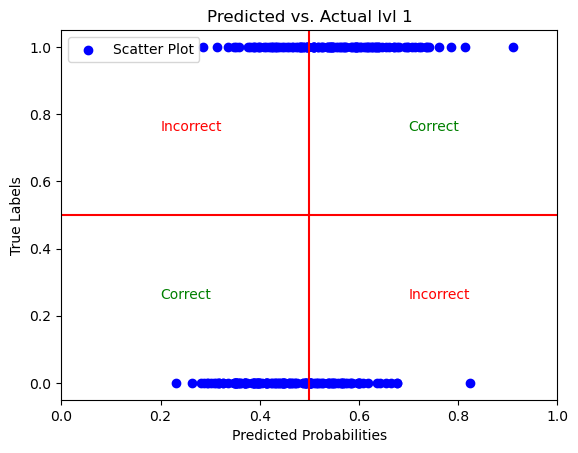

In [35]:
plt.scatter(lvl_probabilities[1], y_test, color='blue', label='Scatter Plot')
plt.xlabel('Predicted Probabilities')
plt.ylabel('True Labels')
plt.title('Predicted vs. Actual lvl 1')
plt.axvline(x=0.5, color='r')
plt.axhline(y=0.5, color='r')
plt.text(0.2, 0.75, "Incorrect", fontsize = 10, color = 'red')
plt.text(0.2, 0.25, "Correct", fontsize = 10, color = 'green')
plt.text(0.7, 0.75, "Correct", fontsize = 10, color = 'green')
plt.text(0.7, 0.25, "Incorrect", fontsize = 10, color = 'red')
plt.xlim(0,1)
plt.legend()
plt.show

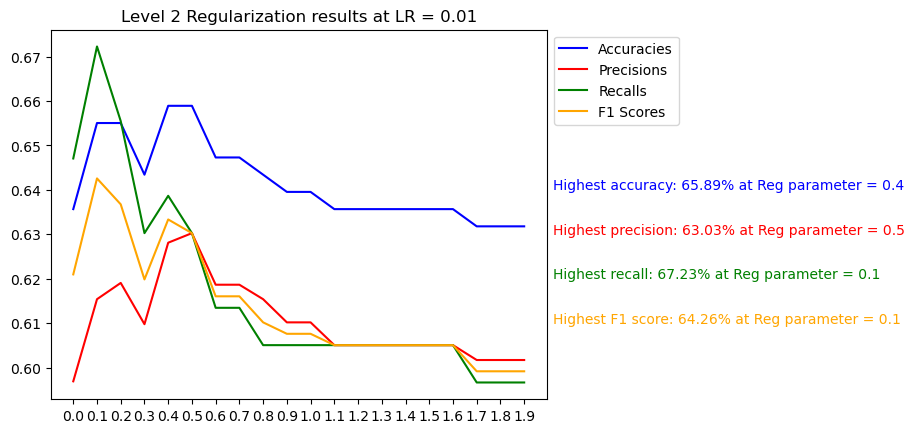

In [36]:
plt.clf
plt.plot(regs, l2_accuracies, color='blue', label='Accuracies')
plt.plot(regs, l2_precisions, color='red', label='Precisions')
plt.plot(regs, l2_recalls, color='green', label='Recalls')
plt.plot(regs, l2_f1Scores, color='orange', label='F1 Scores')
plt.title('Level 2 Regularization results at LR = 0.01')

plt.text(np.max(regs) + 0.12, 0.64,
         f'Highest accuracy: {round(np.max(l2_accuracies)*100, 2)}% at Reg parameter = {regs[l2_accuracies.index(np.max(l2_accuracies))]}',
         fontsize = 10, color = 'blue')
plt.text(np.max(regs) + 0.12, 0.63,
         f'Highest precision: {round(np.max(l2_precisions)*100, 2)}% at Reg parameter = {regs[l2_precisions.index(np.max(l2_precisions))]}',
         fontsize = 10, color = 'red')
plt.text(np.max(regs) + 0.12, 0.62,
         f'Highest recall: {round(np.max(l2_recalls)*100, 2)}% at Reg parameter = {regs[l2_recalls.index(np.max(l2_recalls))]}',
         fontsize = 10, color = 'green')
plt.text(np.max(regs) + 0.12, 0.61,
         f'Highest F1 score: {round(np.max(l2_f1Scores)*100, 2)}% at Reg parameter = {regs[l2_f1Scores.index(np.max(l2_f1Scores))]}',
         fontsize = 10, color = 'orange')


plt.xticks(np.arange(0, 2, 0.1))
plt.legend(bbox_to_anchor=(1.28, 1))
plt.show()
# plt.savefig('Bias_0to5.png')

<function matplotlib.pyplot.show(close=None, block=None)>

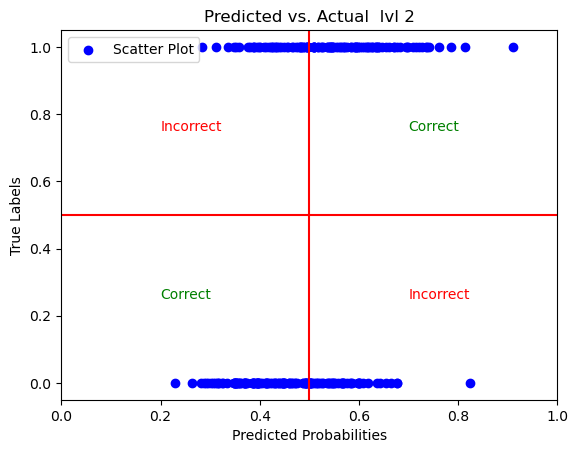

In [37]:
plt.scatter(lvl_probabilities[2], y_test, color='blue', label='Scatter Plot')
plt.xlabel('Predicted Probabilities')
plt.ylabel('True Labels')
plt.title('Predicted vs. Actual  lvl 2')
plt.axvline(x=0.5, color='r')
plt.axhline(y=0.5, color='r')
plt.text(0.2, 0.75, "Incorrect", fontsize = 10, color = 'red')
plt.text(0.2, 0.25, "Correct", fontsize = 10, color = 'green')
plt.text(0.7, 0.75, "Correct", fontsize = 10, color = 'green')
plt.text(0.7, 0.25, "Incorrect", fontsize = 10, color = 'red')
plt.xlim(0,1)
plt.legend()
plt.show

# Creation of the final model

In [38]:
final_model = LogisticRegression(learning_rate=0.01, num_iterations=opt_iter, regularization = None, reg_param = 0.1)
model.fit(X_train_normalized, y_train, X_test_normalized, y_test)

In [39]:
probabilities = model.predict_prob(X_test_normalized)
predictions = model.predict(X_test_normalized)

<function matplotlib.pyplot.show(close=None, block=None)>

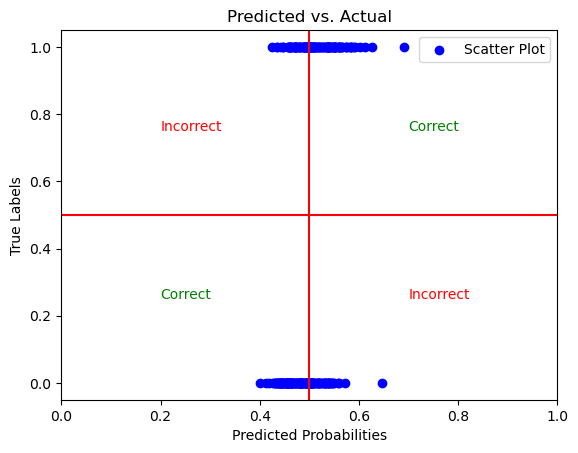

In [40]:
plt.scatter(probabilities, y_test, color='blue', label='Scatter Plot')
plt.xlabel('Predicted Probabilities')
plt.ylabel('True Labels')
plt.title('Predicted vs. Actual')
plt.axvline(x=0.5, color='r')
plt.axhline(y=0.5, color='r')
plt.text(0.2, 0.75, "Incorrect", fontsize = 10, color = 'red')
plt.text(0.2, 0.25, "Correct", fontsize = 10, color = 'green')
plt.text(0.7, 0.75, "Correct", fontsize = 10, color = 'green')
plt.text(0.7, 0.25, "Incorrect", fontsize = 10, color = 'red')
plt.xlim(0,1)
plt.legend()
plt.show

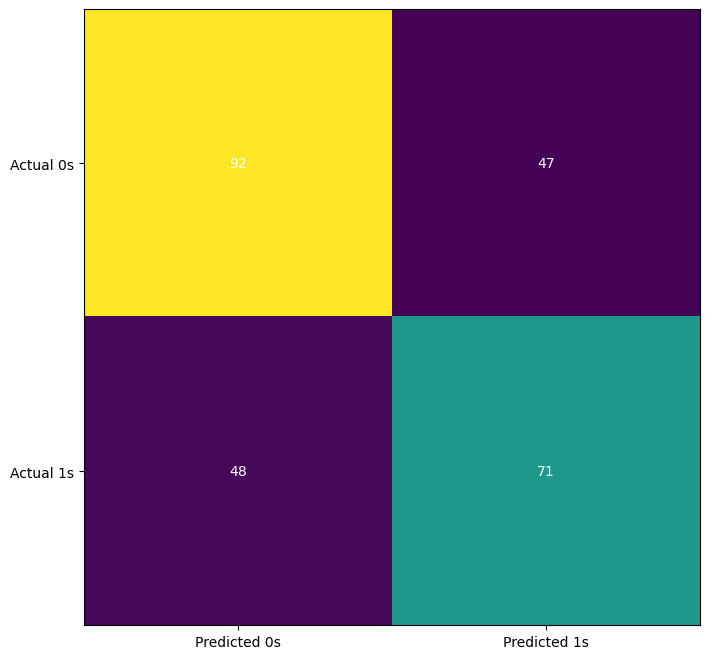

In [41]:
cm = confusion_matrix(y_test, model.predict(X_test_normalized))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [42]:
print(classification_report(y_test, model.predict(X_test_normalized)))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       139
           1       0.60      0.60      0.60       119

    accuracy                           0.63       258
   macro avg       0.63      0.63      0.63       258
weighted avg       0.63      0.63      0.63       258



In [43]:
from sklearn.linear_model import LogisticRegression as skLR

skModel = skLR()

In [44]:
skModel.fit(X_train_normalized, y_train)

LogisticRegression()

In [45]:
predictions = skModel.predict(X_test_normalized)

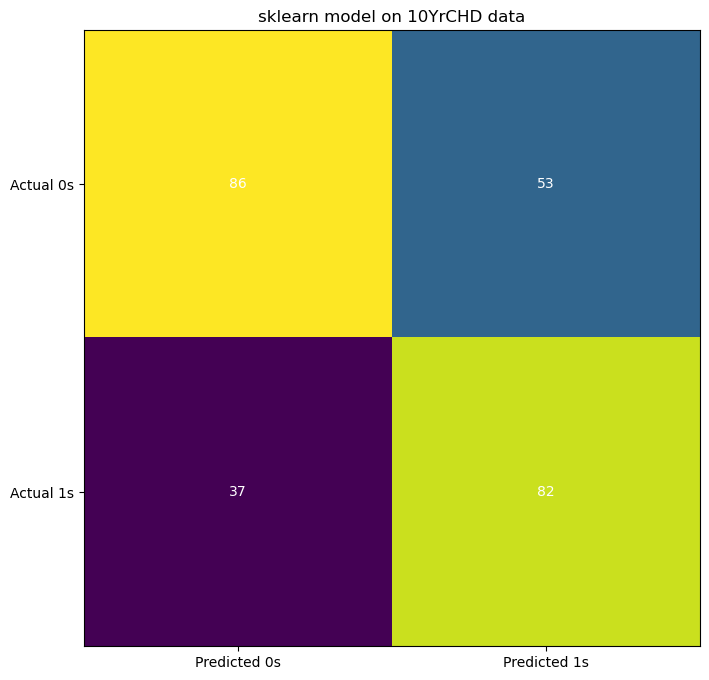

In [46]:
cm = confusion_matrix(y_test, skModel.predict(X_test_normalized))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.title("sklearn model on 10YrCHD data")
plt.show()

In [47]:
print(classification_report(y_test, skModel.predict(X_test_normalized)))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66       139
           1       0.61      0.69      0.65       119

    accuracy                           0.65       258
   macro avg       0.65      0.65      0.65       258
weighted avg       0.66      0.65      0.65       258



In [48]:
print(f'Accuracy of the skLearn model is {round(accuracy_score(y_test, predictions)*100, 2)}%')

Accuracy of the skLearn model is 65.12%


# Testing My model on known Linear Dataset

In [49]:
class LogisticRegressionFlower:
    def __init__(self, learning_rate=0.001, num_iterations=1000, regularization=None, reg_param=0.1, verbose = False, history = False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization = regularization  # 'l1', 'l2', or None
        self.reg_param = reg_param  # Regularization parameter
        self.history = history
        self.verbose = verbose
        self.weights = None
        if history: self.metrics = [],[],[],[]

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def bce_loss(self, pred_y, true_y):
        epsilon = 1e-15  # Small constant to prevent log(0)
        pred_y = np.clip(pred_y, epsilon, 1 - epsilon)
        loss = -np.mean(true_y * np.log(pred_y) + (1 - true_y) * np.log(1 - pred_y))
        return loss
    
    def history_func(self, X_val, y_val): 
        val_z = np.dot(X_val, self.weights)
        val_prob = self.sigmoid(val_z)
        val_pred = (val_prob >= 0.5).astype(int)
        
        self.metrics[0].append(accuracy_score(y_val, val_pred))
        self.metrics[1].append(precision_score(y_val,val_pred))
        self.metrics[2].append(recall_score(y_val,val_pred))
        self.metrics[3].append(f1_score(y_val, val_pred))
        
        
        
    def fit(self, X_train, y_train, X_val, y_val):
        y_train = y_train.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)

        m, n = X_train.shape
        self.weights = np.zeros((n, 1))
        
        for i in range(self.num_iterations):
            z = np.dot(X_train, self.weights)
            pred_y = self.sigmoid(z)
            error = pred_y - y_train

            weight_gradient = np.dot(X_train.T, error) / m
            # bias_gradient = np.sum(error) / m

            if self.regularization == 'l1':
                weight_gradient += (self.reg_param / m) * np.sign(self.weights)
            elif self.regularization == 'l2':
                weight_gradient += (self.reg_param / m) * self.weights
            
            self.weights -= self.learning_rate * weight_gradient
            self.weights -= self.learning_rate * self.reg_param * self.weights
            
            # print(self.history)
            if self.history: 
                self.history_func(X_val, y_val)

            if i % 100 == 0 and self.verbose:
                train_loss = self.bce_loss(pred_y, y_train)
                val_z = np.dot(X_val, self.weights)
                val_prob = self.sigmoid(val_z)
                val_pred = (val_prob >= 0.5).astype(int)
                val_loss = self.bce_loss(val_pred, y_val)

                val_acc = accuracy_score(y_val,val_pred)# (val_pred >= 0.5).astype(int))
                print(f"Iteration {i}, Train Loss: {train_loss}, Val Loss: {val_loss}, Val Accuracy: {val_acc}")
        
        if self.history:
            return self.metrics
    
    def predict_prob(self, X):
        z = np.dot(X, self.weights)
        return self.sigmoid(z)
    
    def predict(self, X):
        return self.predict_prob(X).round()


In [50]:
from sklearn import datasets

iris = datasets.load_iris()


X = iris.data[:, :2]
y = (iris.target != 0) * 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model_flower = LogisticRegressionFlower(learning_rate=0.1, num_iterations=300000)
model_flower.fit(X_train, y_train, X_test, y_test)

In [52]:
print(classification_report(y, model_flower.predict(X)))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        50
           1       0.88      1.00      0.93       100

    accuracy                           0.91       150
   macro avg       0.94      0.86      0.89       150
weighted avg       0.92      0.91      0.90       150

